In [1]:
import sys
sys.path.append('../')
import executor
import os
import matplotlib.pyplot as plt
from statistics import geometric_mean
import json

In [2]:
ROOT_DIR = "/home/huawei/dev/ChampSim"
LFU_CFG = "tasks/task2/configs/lfu.json"
TASK_2_DIR = "/home/huawei/dev/ChampSim/tasks/task2"
LRU_CFG = "tasks/task2/configs/lru.json"
TRACES_DIR = "tasks/traces"
RESULTS_DIR = "tasks/task2/results"
WARMUP = 5000000
INSTRS_COUNT = 20000000

In [5]:
executor.build_sim(LRU_CFG, ROOT_DIR)

mkdir /home/huawei/dev/ChampSim/.csconfig/32c6145f/obj
mkdir /home/huawei/dev/ChampSim/.csconfig/32c6145f/btbDbasic_btb
mkdir /home/huawei/dev/ChampSim/.csconfig/32c6145f/branchDbimodal
mkdir /home/huawei/dev/ChampSim/.csconfig/32c6145f/prefetcherDno
mkdir /home/huawei/dev/ChampSim/.csconfig/32c6145f/prefetcherDno_instr
mkdir /home/huawei/dev/ChampSim/.csconfig/32c6145f/replacementDlru
g++ --std=c++17 -O3 -Wall -Wextra -Wshadow -Wpedantic -MMD -I/home/huawei/dev/ChampSim/inc -isystem /home/huawei/dev/ChampSim/vcpkg_installed/x64-linux/include -I/home/huawei/dev/ChampSim/src -I/home/huawei/dev/ChampSim/.csconfig/32c6145f/inc  -c -o /home/huawei/dev/ChampSim/.csconfig/32c6145f/obj/channel.o /home/huawei/dev/ChampSim/src/channel.cc
g++ --std=c++17 -O3 -Wall -Wextra -Wshadow -Wpedantic -MMD -I/home/huawei/dev/ChampSim/inc -isystem /home/huawei/dev/ChampSim/vcpkg_installed/x64-linux/include -I/home/huawei/dev/ChampSim/src -I/home/huawei/dev/ChampSim/.csconfig/32c6145f/inc  -c -o /home/huawe

In [6]:
executor.run_traces(TRACES_DIR, f"{RESULTS_DIR}/lru", ROOT_DIR, WARMUP, INSTRS_COUNT)

Running tasks/traces/641.leela_s-149B.champsimtrace.xz...........................
Running tasks/traces/603.bwaves_s-2931B.champsimtrace.xz...........................
Running tasks/traces/619.lbm_s-2676B.champsimtrace.xz...........................
Running tasks/traces/607.cactuBSSN_s-2421B.champsimtrace.xz...........................
Running tasks/traces/654.roms_s-293B.champsimtrace.xz...........................
Running tasks/traces/649.fotonik3d_s-1176B.champsimtrace.xz...........................
Running tasks/traces/627.cam4_s-490B.champsimtrace.xz...........................
Running tasks/traces/605.mcf_s-1536B.champsimtrace.xz...........................
Running tasks/traces/620.omnetpp_s-141B.champsimtrace.xz...........................
Running tasks/traces/600.perlbench_s-1273B.champsimtrace.xz...........................
Running tasks/traces/657.xz_s-4994B.champsimtrace.xz...........................
Running tasks/traces/621.wrf_s-575B.champsimtrace.xz...........................
Runni

In [36]:
executor.build_sim(LFU_CFG, ROOT_DIR)

mkdir /home/huawei/dev/ChampSim/.csconfig/452c291c/obj
mkdir /home/huawei/dev/ChampSim/.csconfig/452c291c/btbDbasic_btb
mkdir /home/huawei/dev/ChampSim/.csconfig/452c291c/branchDbimodal
mkdir /home/huawei/dev/ChampSim/.csconfig/452c291c/prefetcherDno
mkdir /home/huawei/dev/ChampSim/.csconfig/452c291c/prefetcherDno_instr
mkdir /home/huawei/dev/ChampSim/.csconfig/452c291c/replacementDlfu
mkdir /home/huawei/dev/ChampSim/.csconfig/452c291c/replacementDlru
g++ --std=c++17 -O3 -Wall -Wextra -Wshadow -Wpedantic -MMD -I/home/huawei/dev/ChampSim/inc -isystem /home/huawei/dev/ChampSim/vcpkg_installed/x64-linux/include -I/home/huawei/dev/ChampSim/src -I/home/huawei/dev/ChampSim/.csconfig/452c291c/inc  -c -o /home/huawei/dev/ChampSim/.csconfig/452c291c/obj/channel.o /home/huawei/dev/ChampSim/src/channel.cc
g++ --std=c++17 -O3 -Wall -Wextra -Wshadow -Wpedantic -MMD -I/home/huawei/dev/ChampSim/inc -isystem /home/huawei/dev/ChampSim/vcpkg_installed/x64-linux/include -I/home/huawei/dev/ChampSim/src -I

In [37]:
executor.run_traces(TRACES_DIR, f"{RESULTS_DIR}/lfu", ROOT_DIR, WARMUP, INSTRS_COUNT)

Running tasks/traces/641.leela_s-149B.champsimtrace.xz...........................
Running tasks/traces/603.bwaves_s-2931B.champsimtrace.xz...........................
Running tasks/traces/619.lbm_s-2676B.champsimtrace.xz...........................
Running tasks/traces/607.cactuBSSN_s-2421B.champsimtrace.xz...........................
Running tasks/traces/654.roms_s-293B.champsimtrace.xz...........................
Running tasks/traces/649.fotonik3d_s-1176B.champsimtrace.xz...........................
Running tasks/traces/627.cam4_s-490B.champsimtrace.xz...........................
Running tasks/traces/605.mcf_s-1536B.champsimtrace.xz...........................
Running tasks/traces/620.omnetpp_s-141B.champsimtrace.xz...........................
Running tasks/traces/600.perlbench_s-1273B.champsimtrace.xz...........................
Running tasks/traces/657.xz_s-4994B.champsimtrace.xz...........................
Running tasks/traces/621.wrf_s-575B.champsimtrace.xz...........................
Runni

##### Collect stats

In [38]:
class Stats:
    mpki: float
    hits: float
    misses: float

    def __init__(self, instrs, cycles, hits, misses):
        self.hits = hits
        self.misses = misses
        self.ipc = float(instrs) / cycles

stats = {}

In [49]:
os.chdir(TASK_2_DIR)
pols = ["lru", "lfu"]
for pol in pols:
    stats_dir_name = f"results/{pol}"
    stats_dir = os.fsencode(stats_dir_name)

    stats.update({pol: {}})
    for file in os.listdir(stats_dir):
        file = file.decode("ascii")
        file_path = f"{stats_dir_name}/{file}"
        with open(file_path) as f:
            data = json.load(f)[0]["sim"]
        
        instrs = data["cores"][0]["instructions"]
        cycles = data["cores"][0]["cycles"]

        hits = sum(map(lambda x: x["hit"][0], [data["cpu0_L2C"]["LOAD"], data["cpu0_L2C"]["WRITE"], data["cpu0_L2C"]["TRANSLATION"]]))
        misses = sum(map(lambda x: x["miss"][0], [data["cpu0_L2C"]["LOAD"], data["cpu0_L2C"]["WRITE"], data["cpu0_L2C"]["TRANSLATION"]]))

        stats[pol].update({ file: Stats(instrs, cycles, hits, misses) })

In [50]:
tests = []
hit_rates = {}
ipcs = {}

for test in stats["lru"]:
    tests.append(test)

for pol in stats:
    hit_rates.update({pol: []})
    ipcs.update({pol: []})
    for test in stats[pol]:
        hit_rates[pol].append(stats[pol][test].hits / (stats[pol][test].hits + stats[pol][test].misses))
        ipcs[pol].append(stats[pol][test].ipc)

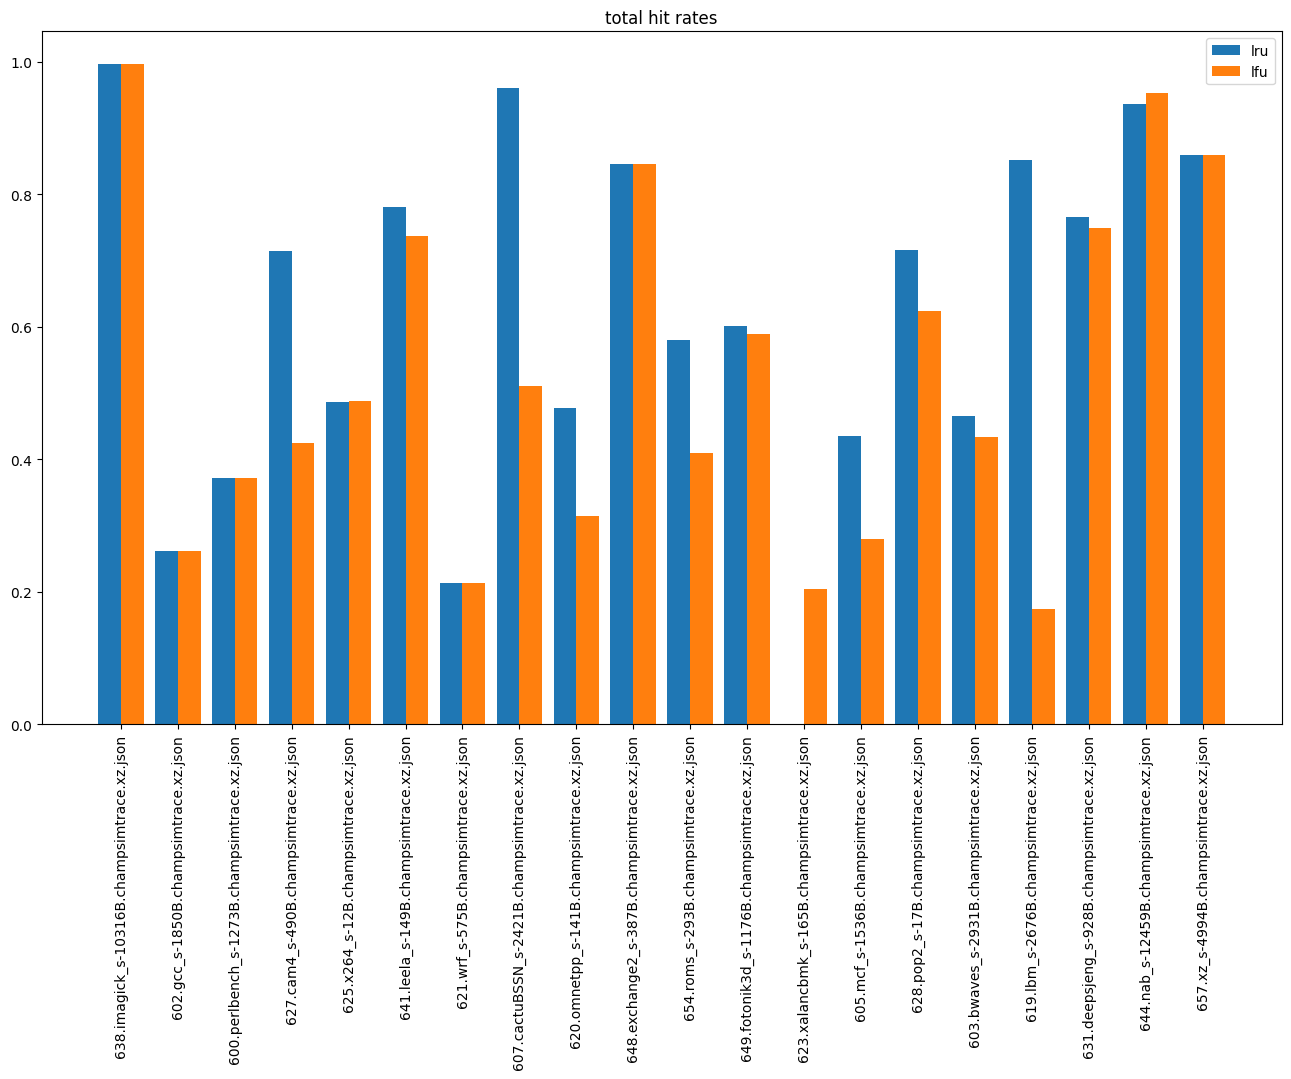

In [51]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(9)
executor.bar_plot(ax, hit_rates, title="total hit rates", xticks=tests)
plt.show()

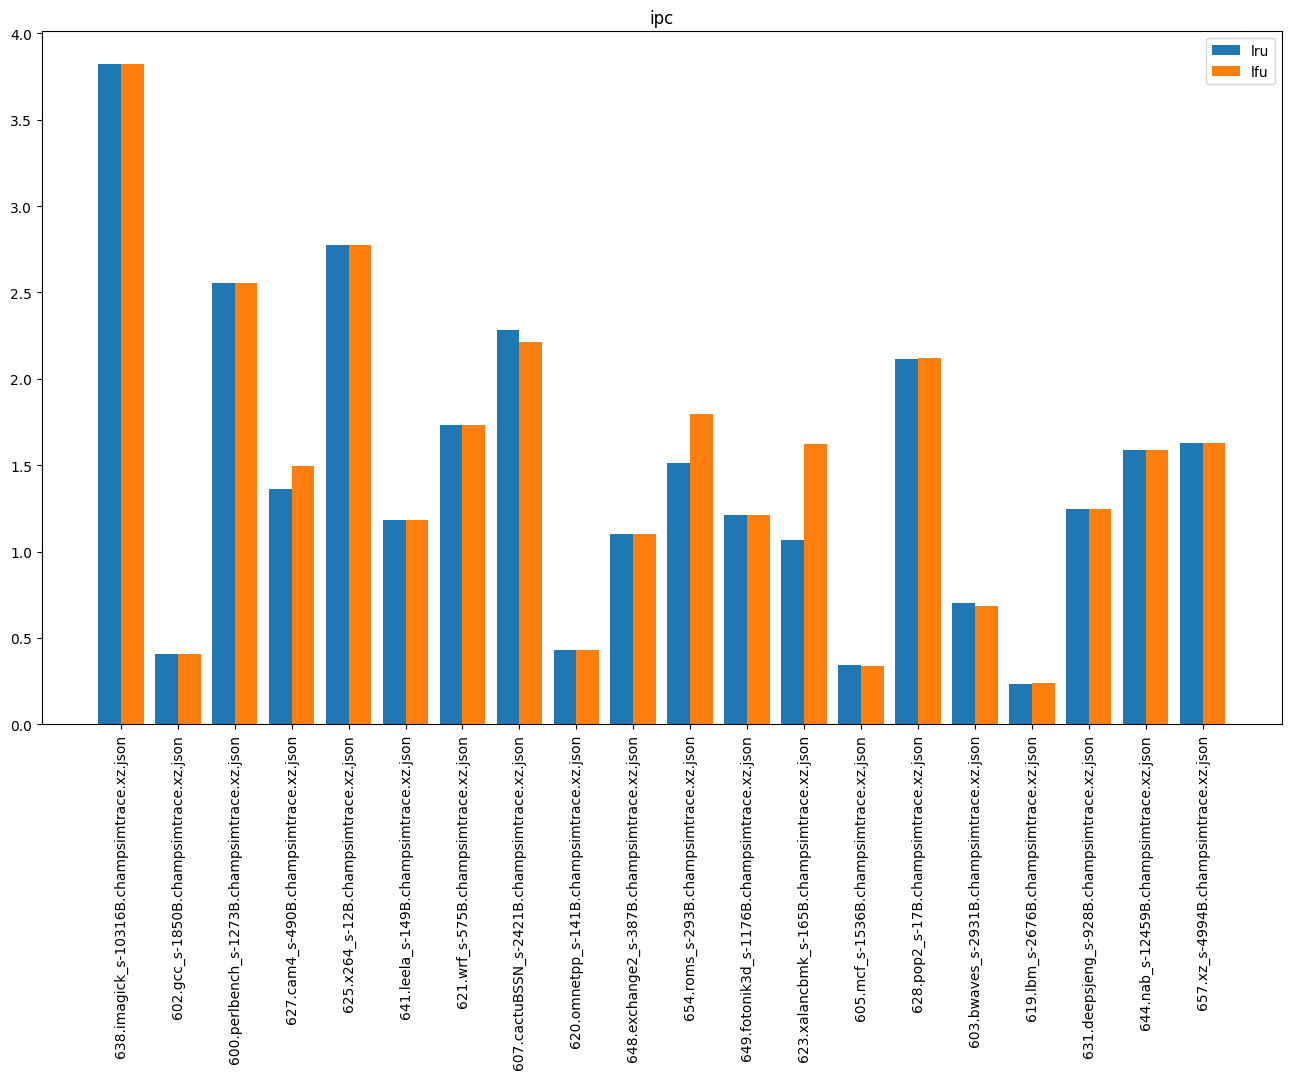

In [52]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(9)
executor.bar_plot(ax, ipcs, title="ipc", xticks=tests)
plt.show()

In [53]:
for pol in hit_rates.keys():
    print(f"GMEAN hit rate for {pol}: {geometric_mean(hit_rates[pol])}")

GMEAN hit rate for lru: 0.42580495649502703
GMEAN hit rate for lfu: 0.4586052457172404


In [54]:
for pol in ipcs.keys():
    print(f"GMEAN IPC for {pol}: {geometric_mean(ipcs[pol])}")

GMEAN IPC for lru: 1.1746013523417302
GMEAN IPC for lfu: 1.2137159062332243


### Summary:

В работе исследовались IPC и hitrate для 2 политик кеширования: LFU и LRU. На диаграммах изображены метрики как для отдельных бенчмарков, так и геометрическое среднее для всех бенчмарков.

LFU в среднем показывает чуть лучший результат относительно LRU. LFU лучше подходит для паттернов, в которых некоторые данные встречаются значительно чаще остальных.

Отличия в IPC для отдельных бенчмарков незначительные. На SPEC 619 и 607 hitrate LRU значительно выше. Это может быть связано с равномерным распределением данных по частоте.